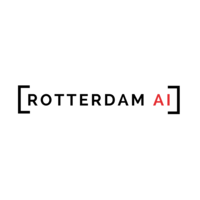

# Week 4

**Table of Contents**
1. [Quick Recap from Python_Week_3](#quick-recap-from-python-week1)
2. [EDA: Whats and whys](#list-tuples-sets-dictionaries-files)
3. [Use Case](#conditionals-and-branching)
4. [Data Exploration](#)
5. [Data Cleaning](#functions)
6. [Categorical Data Analysis](#oop)
7. [Quantitative Data Analysis](#numpy)

## Quick recap from week 3

In [1]:
#TODO

## EDA 

## read in dataset

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.cm as cm


InteractiveShell.ast_node_interactivity = "all"

plt.rcParams["figure.figsize"] = [16,12]

salaries_url = 'https://rotterdamai001.blob.core.windows.net/python/mlb/core/Salaries.csv'

batting_url = 'https://rotterdamai001.blob.core.windows.net/python/mlb/core/Batting.csv'
df = pd.read_csv(salaries_url)
# batting = pd.read_csv(batting_url)

In [3]:
#TODO - Define and motivate

## Use Case:
## we are scouting for baseball players so we want to understand dynamics behind the players salary. To do so, we start investigating their salaries over time to get to know our data a bit better

### lets see which columns are numeric

In [4]:
df.dtypes

yearID       int64
teamID      object
lgID        object
playerID    object
salary       int64
dtype: object

## How could we plot year and salary against each other?

In [5]:
df.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


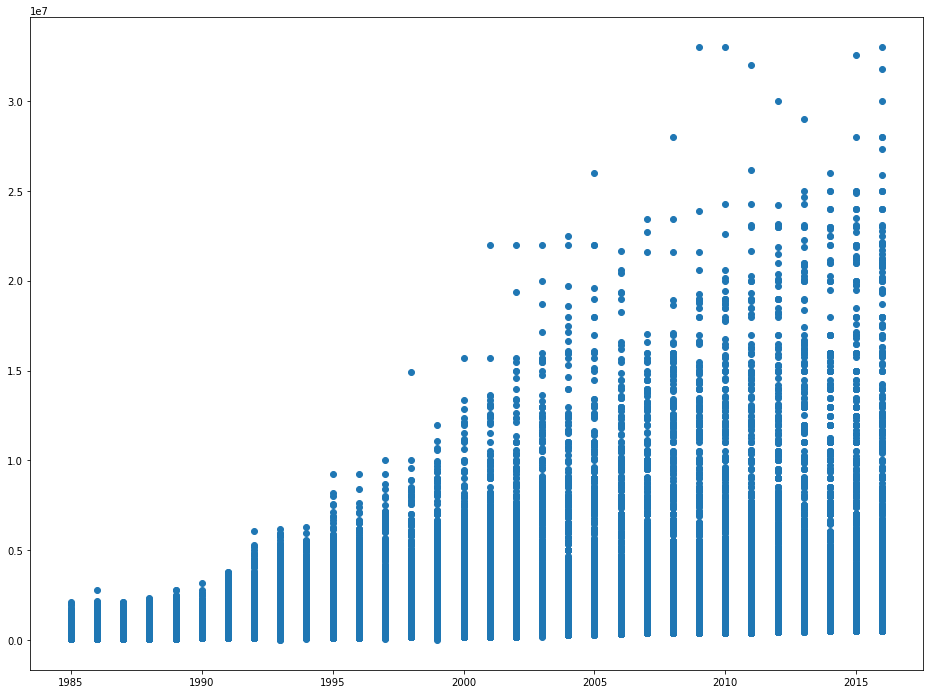

In [6]:
plt.scatter( df['yearID'], df['salary']);


## the Y column seems weird, the salaries are higher than 3.0..? Lets make it clearer

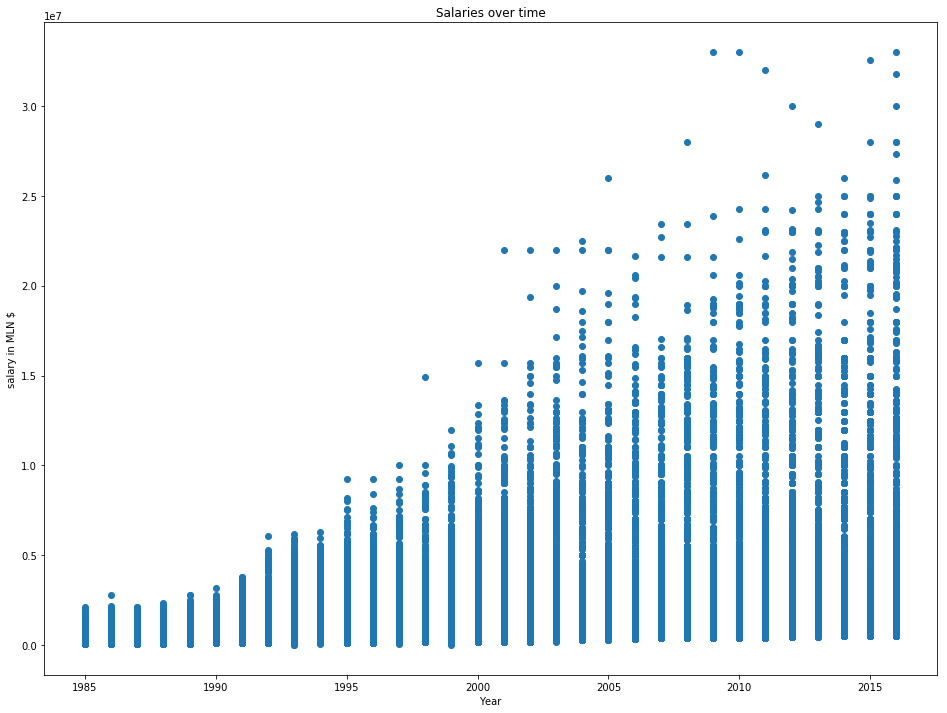

In [7]:
plt.scatter( df['yearID'], df['salary']);
plt.ylabel('salary in MLN $');
plt.xlabel('Year');
plt.title('Salaries over time');

['NL' 'AL']


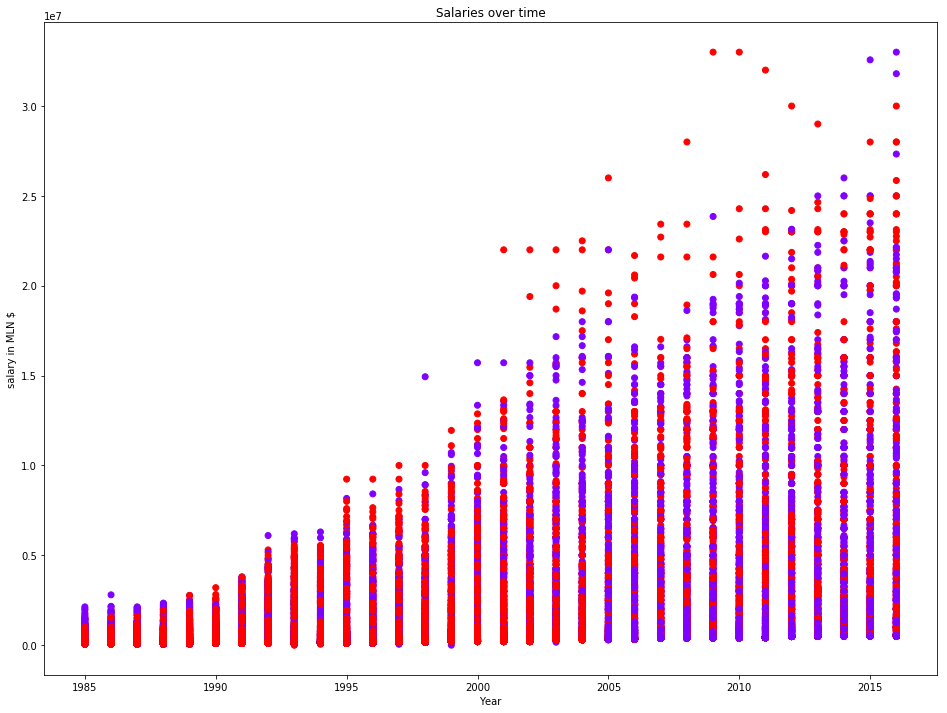

In [17]:
print(df.lgID.unique())
colors = cm.rainbow(np.linspace(0, 1, len(df.lgID.unique())))
col = []
for x in df.lgID:
    if x == 'NL':
        first_col = colors[0]
        col.append(first_col)
    else:
        second_col = colors[1]
        col.append(second_col)
        
    
plt.scatter( df['yearID'], df['salary'],c = col);
plt.ylabel('salary in MLN $');
plt.xlabel('Year');
plt.title('Salaries over time');


In [15]:
colors = cm.rainbow(np.linspace(0, 1, len(df.lgID.unique())))
len(colors)
df.lgID.unique()[0]

2

'NL'

## from this we can conclude that:
## 1) salaries increased over time (avg inflation could play a role)
## 2) our data availability is higher over time (or maybe just more players are playing baseball) 

## Next steps are to see what is going on over time in general, and between the teams, as certain teams might have a bigger budget..

In [8]:
## lets start by looking at a slice in time, for example data in 2013

In [9]:
year_data = df.loc[df['yearID'] == 2013,:]

In [10]:
year_data.head()

,yearID,teamID,lgID,playerID,salary
23141,2013,ARI,NL,bellhe01,10000000
23142,2013,ARI,NL,bloomwi01,1900000
23143,2013,ARI,NL,cahiltr01,5700000
23144,2013,ARI,NL,campato01,497500
23145,2013,ARI,NL,chaveer01,3000000


In [11]:
salary_2013 = year_data['salary']

In [12]:
min(salary_2013)
max(salary_2013)


480000

29000000

In [13]:
## Min and Max are quite different, between .48 Mln to 29 Million. Lets look at the distribution



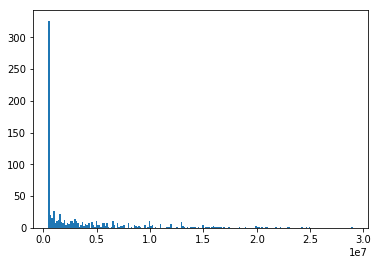

In [14]:

plt.hist(salary_2013, bins = 200) ; 


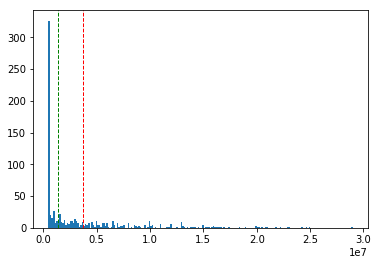

In [15]:
plt.hist(year_data['salary'], bins = 200) ; 
plt.axvline(salary_2013.mean(), color='r', linestyle='dashed', linewidth=1);
plt.axvline(salary_2013.median(), color='g', linestyle='dashed', linewidth=1);


In [16]:
## lets zoom in in the first part, where most of the data is concentrated

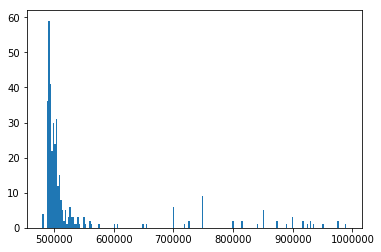

In [17]:
lower_than_million_2013 = year_data['salary'][year_data['salary'] < 1000000]
plt.hist(lower_than_million_2013, bins = 200) ; 

## we can also set paramets in the plotting part and obtain similar results

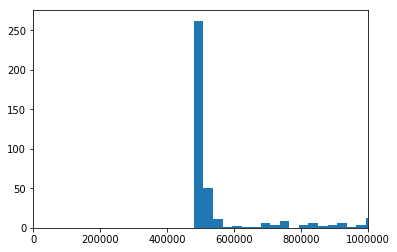

In [18]:
plt.hist(year_data['salary'], bins = 1000) ; 
plt.xlim(0,1000000);

## so a lot of players are earning 'the base salary', while few are earning a lot more!


## Now try to make a function that give a year, can plot the salaries lower than one million!

## Now lets look at the team, and their distributions. FOr this we can use a box plot

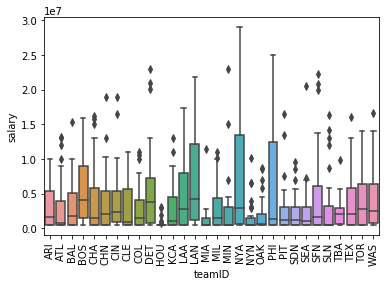

In [19]:
import seaborn as sns
sns.boxplot(x="teamID", y="salary", data=year_data);
plt.xticks(rotation = 90);

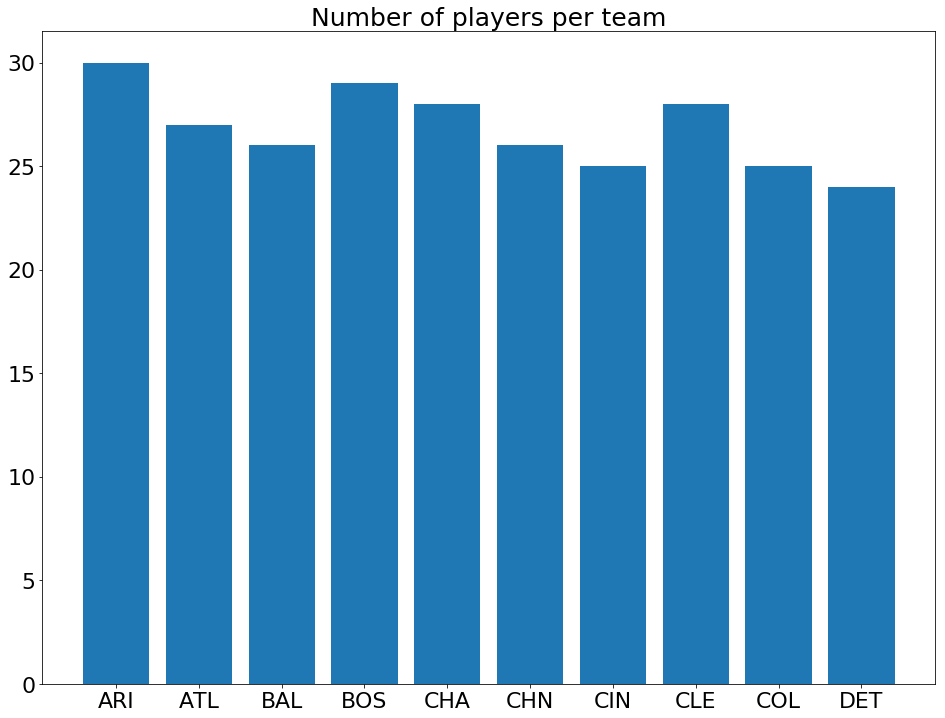

In [45]:
count_team = year_data.groupby(['teamID'])['playerID'].count()
# sns.barplot(x="index", y="teamID", data=count_team)
# plt.bar(count_team,
count_team_red = count_team.head(10)
plt.bar(count_team_red.index, count_team_red);
plt.xticks(fontsize = 22);
plt.yticks(fontsize = 22);
plt.title('Number of players per team', fontsize = 25);

In [20]:
med_salary_over_time = df.groupby(['yearID'])['salary'].median()
mean_salary_over_time = df.groupby(['yearID'])['salary'].mean()


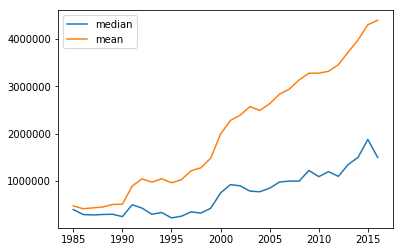

In [21]:
plt.plot(med_salary_over_time, label = 'median');
plt.plot(mean_salary_over_time, label = 'mean');
plt.legend();

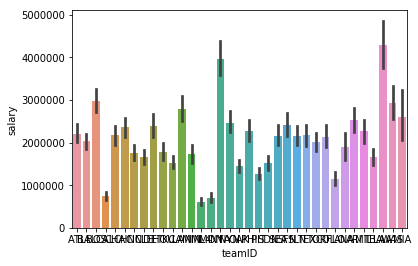

In [22]:
# sns.barplot(x="teamID", y="salary", data=df)

In [23]:
df.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [24]:
## Lets

In [ ]:
#TODO - Introduce the example dataset here
#Find an interesting dataset (imdb movie dataset?)

## Data Exploration

In [ ]:
# TODO
# 1. Read data
# 2. Analyze the columns - Would be a good place to introduce variable types (categorical, quantitative)
# 3. High-level stats, understand what needs to be pruned

## Data Cleaning 

In [ ]:
# TODO
# 1. Required: Normalization, Dealing with Nulls & duplicates
# 2. Optional: Type cast

## Categorical Analysis

In [ ]:
# TODO
# 1. Required: Univariate & Bi-variate analysis

## Quantitative Analysis

In [ ]:
# TODO
# 1. Required: Univariate & Bi-variate analysis

## Best Practices in Visualization

In [ ]:
# TODO
# Visualization is subjective, but there are certain ground rules that define 
# Mis-leading visualizations

### "A visualization is expressive if a visualization encodes all relevant information and only that information" - John D. Mackinlay

In [ ]:
#MISC
#1. Insert challenges in between
#2. Insert cool (relevant) videos
#3. Insert some cool visualizations! 